#Analisando notas de filmes

In [1]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [ ]:
notas = pd.read_csv('ratings.csv')

In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.columns = ['usuário','filmeid','nota','momento']

In [ ]:
notas.shape

(100836, 4)

In [ ]:
notas.head()

,usuário,filmeid,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [ ]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
notas['nota'].mean()

3.501556983616962

Outra forma de escrever notas['nota'] é notas.nota

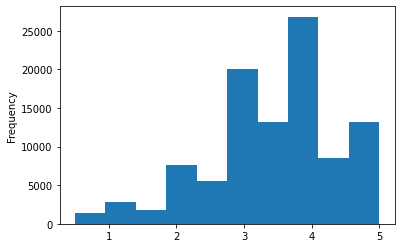

In [ ]:
notas.nota.plot(kind='hist')

In [ ]:
print('Mediana =',notas.nota.median())
print('Média =',notas.nota.mean())

Mediana = 3.5
Média = 3.501556983616962


In [ ]:
import seaborn as sb

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


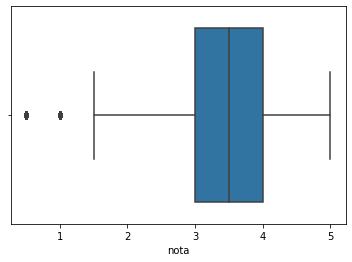

In [ ]:
sb.boxplot(notas.nota)

#Analisando filmes

In [ ]:
filmes = pd.read_csv('movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
filmes.columns=['filmeid','filme','genero']
filmes.head()

,filmeid,filme,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analisando filmes específicos

In [ ]:
filmes.query('filmeid==1')

,filmeid,filme,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
notas.query('filmeid==1').nota.mean()

3.9209302325581397

In [ ]:
medias_por_filme = notas.groupby('filmeid').mean().nota
medias_por_filme.head()

filmeid
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

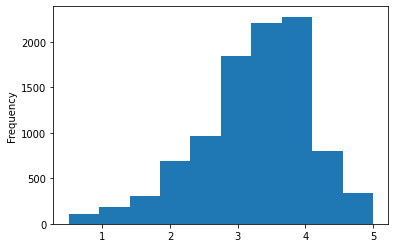

In [ ]:
medias_por_filme.plot(kind='hist')

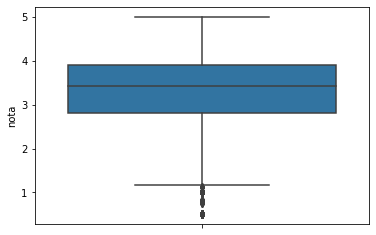

In [ ]:
sb.boxplot(y=medias_por_filme)

In [ ]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


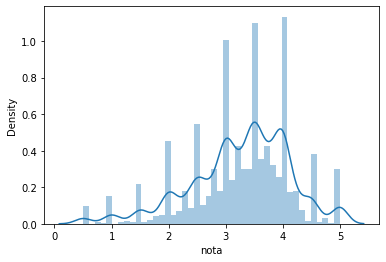

In [ ]:
sb.distplot(medias_por_filme)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


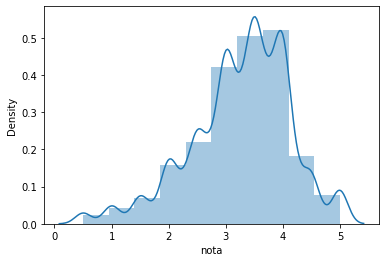

In [ ]:
sb.distplot(medias_por_filme,bins=10)

#Usando a biblioteca matlplotlib

OBS.: O seaborn usa o pyplot por trás. Logo ao importar o seaborn, o mesmo importa o matplotlib.pyplot também.

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histograma das Médias das Notas dos Filmes')

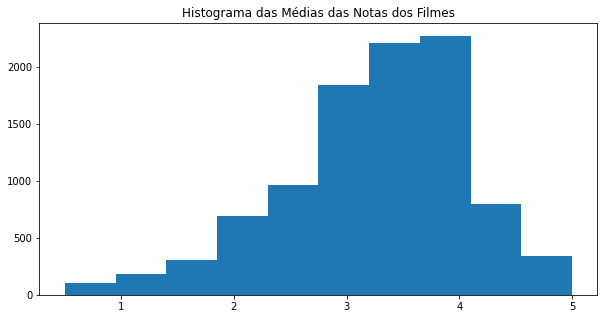

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(medias_por_filme)
plt.title('Histograma das Médias das Notas dos Filmes')

In [ ]:
notas_do_toy_story = notas.query("filmeid==1")
notas_do_jumanji = notas.query("filmeid==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [ ]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [ ]:
from google.colab import drive
drive.mount('/content/drive')